<a href="https://colab.research.google.com/github/le11nguyen/AIO-Exercise/blob/main/M4W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# dataset
import numpy as np
import matplotlib . pyplot as plt
import random

In [76]:
def get_column ( data , index ) :

  # your code here ****************************
  result = []
  for i in range ( len ( data ) ) :
    result.append ( data [ i ] [ index ] )
  return result

def prepare_data ( file_name_dataset ) :
  data = np . genfromtxt ( file_name_dataset , delimiter =',', skip_header =1) . tolist ()
  N = len( data )
  # get tv ( index =0)
  tv_data = get_column ( data , 0)

  # get radio ( index =1)
  radio_data = get_column ( data , 1)

  # get newspaper ( index =2)
  newspaper_data = get_column ( data , 2)
  # get sales ( index =3)
  sales_data = get_column ( data , 3)

  # building X input and y output for training
  X = [ tv_data , radio_data , newspaper_data ]
  y = sales_data
  return X , y

In [77]:
#Question 1
X , y = prepare_data ( '/content/advertising.csv')
listx = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
print ( listx )

[624.1, 175.10000000000002, 300.5, 78.9]


In [78]:
def implement_linear_regression ( X_data , y_data , epoch_max = 50 , lr = 0.0001) :
  losses = []

  w1 , w2 , w3 , b = initialize_params ()

  N = len( y_data )
  for epoch in range ( epoch_max ) :
    for i in range ( N ) :
      # get a sample
      x1 = X_data [0][ i ]
      x2 = X_data [1][ i ]
      x3 = X_data [2][ i ]

      y = y_data [ i ]

      # compute output
      y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )

      # compute loss
      loss = compute_loss (y , y_hat )

      # compute gradient w1 , w2 , w3 , b
      dl_dw1 = compute_gradient_wi ( x1 , y , y_hat )
      dl_dw2 = compute_gradient_wi ( x2 , y , y_hat )
      dl_dw3 = compute_gradient_wi ( x3 , y , y_hat )
      dl_db = compute_gradient_b (y , y_hat )
      # update parameters
      w1 = update_weight_wi ( w1 , dl_dw1 , lr )
      w2 = update_weight_wi ( w2 , dl_dw2 , lr )
      w3 = update_weight_wi ( w3 , dl_dw3 , lr )
      b = update_weight_b (b , dl_db , lr )

      # logging
      losses . append ( loss )
  return ( w1 , w2 , w3 ,b , losses )

In [79]:
# def initialize_params () :
#   w1 = random . gauss ( mu =0.0 , sigma =0.01)
#   w2 = random . gauss ( mu =0.0 , sigma =0.01)
#   w3 = random . gauss ( mu =0.0 , sigma =0.01)
#   b = 0
#   return w1 , w2 , w3 , b

In [80]:
def initialize_params () :
  w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
  return w1 , w2 , w3 , b

In [81]:
def predict ( x1 , x2 , x3 , w1 , w2 , w3 , b ) :
  result = w1 * x1 + w2 * x2 + w3 * x3 + b
  return result

In [82]:
y = predict ( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print ( y )

1.0


In [83]:
def compute_loss ( y_hat , y ) :
  loss = ( y_hat - y ) ** 2
  return loss

In [84]:
l = compute_loss ( y_hat =1 , y =0.5)
print ( l )

0.25


In [85]:
# compute gradient
def compute_gradient_wi (xi , y , y_hat ) :
  dl_dwi = 2 * ( y_hat - y ) * xi
  return dl_dwi

def compute_gradient_b (y , y_hat ) :
  dl_db = 2 * ( y_hat - y )
  return dl_db

In [86]:
#Question 4:
# MSE loss
g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )

-1.0


In [87]:
#Question 5:
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

-3.0


In [88]:
# update weights
def update_weight_wi ( wi , dl_dwi , lr ) :
  wi = wi - lr * dl_dwi
  return wi

def update_weight_b (b , dl_db , lr ) :
  b = b - lr * dl_db
  return b

In [89]:
#Question 6:
after_wi = update_weight_wi ( wi =1.0 , dl_dwi = -0.5 , lr = 0.00001)
print ( after_wi )

1.000005


In [90]:
#Question 7:
after_b = update_weight_b ( b =0.5 , dl_db = -1.0 , lr = 0.00001)
print ( after_b )
print ( after_wi )

0.50001
1.000005


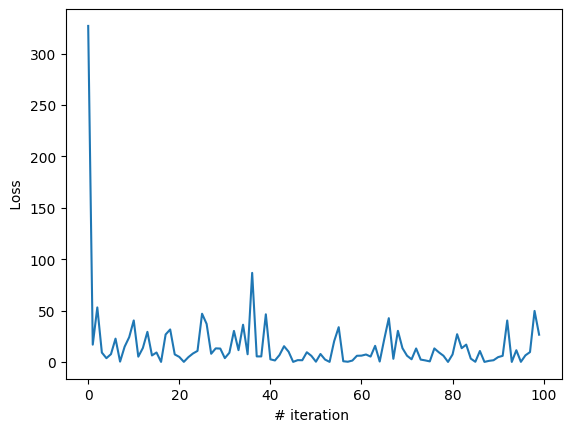

In [92]:
X , y = prepare_data ( '/content/advertising.csv')
w1 , w2 , w3 ,b , losses = implement_linear_regression (X , y , epoch_max = 100 , lr = 0.00001)
plt . plot ( losses [:100])
plt . xlabel ("# iteration ")
plt . ylabel (" Loss ")
plt . show ()

In [95]:
X , y = prepare_data ( '/content/advertising.csv')
w1 , w2 , w3 ,b , losses = implement_linear_regression (X , y , epoch_max = 100 , lr = 0.00001)
print ( w1 , w2 , w3 )

0.07349603146417186 0.15772051993288602 0.01690755305841349


In [102]:
# Question 9:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data ( '/content/advertising.csv')
w1 , w2 , w3 ,b , losses = implement_linear_regression (X , y , epoch_max = 50 , lr = 0.00001)
sales = predict ( tv , radio , newspaper , w1 , w2 , w3 , b )
print (sales)

8.176413319549823


In [105]:
#Question 10:
def compute_loss_mae ( y_hat , y ) :
  loss = abs ( y_hat - y )
  return loss
l = compute_loss_mae ( y_hat =1 , y =0.5)
print ( l )

0.5


In [109]:
def implement_linear_regression_nsamples ( X_data , y_data , epoch_max =50 , lr =0.00001) :
  losses = []

  w1 , w2 , w3 , b = initialize_params ()
  N = len( y_data )
  for epoch in range ( epoch_max ) :

    loss_total = 0.0
    dw1_total = 0.0
    dw2_total = 0.0
    dw3_total = 0.0
    db_total = 0.0

    for i in range ( N ) :
      # get a sample
      x1 = X_data [0][ i ]
      x2 = X_data [1][ i ]
      x3 = X_data [2][ i ]

      y = y_data [ i ]

      # compute output
      y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )

      # compute loss
      loss = compute_loss (y , y_hat )

      # accumulate loss
      # your code here **************
      loss_total += loss

      # compute gradient w1 , w2 , w3 , b
      dl_dw1 = compute_gradient_wi ( x1 , y , y_hat )
      dl_dw2 = compute_gradient_wi ( x2 , y , y_hat )
      dl_dw3 = compute_gradient_wi ( x3 , y , y_hat )
      dl_db = compute_gradient_b (y , y_hat )

      # accumulate gradient w1 , w2 , w3 , b
      dw1_total += dl_dw1
      dw2_total += dl_dw2
      dw3_total += dl_dw3
      db_total += dl_db



    # ( after processing N samples ) - update parameters
    w1 = update_weight_wi ( w1 , dw1_total / N , lr )
    w2 = update_weight_wi ( w2 , dw2_total / N , lr )
    w3 = update_weight_wi ( w3 , dw3_total / N , lr )
    b = update_weight_b (b , db_total / N , lr )

    # logging
    losses . append ( loss_total / N)
  return ( w1 , w2 , w3 ,b , losses )

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

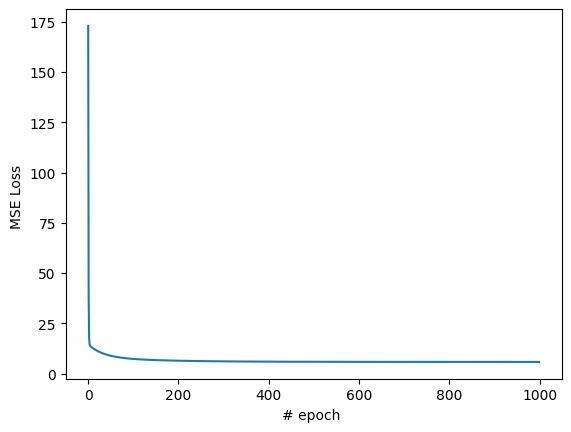

In [110]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y , epoch_max =1000 , lr =0.00001)
print ( losses )
plt . plot ( losses )
plt . xlabel ("# epoch ")
plt . ylabel ("MSE Loss ")
plt . show ()

In [111]:
#Question 11:
X , y = prepare_data ('/content/advertising.csv')
# using MSE loss
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y , epoch_max =1000 , lr =0.00001)


print ( w1 , w2 , w3 )

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [113]:
def prepare_data ( file_name_dataset ) :
  data = np . genfromtxt ( file_name_dataset , delimiter =',', skip_header =1) . tolist ()

  # get tv ( index =0)
  tv_data = get_column ( data , 0)

  # get radio ( index =1)
  radio_data = get_column ( data , 1)

  # get newspaper ( index =2)
  newspaper_data = get_column ( data , 2)

  # get sales ( index =3)
  sales_data = get_column ( data , 3)

  # building X input and y output for training
  # Create list of features for input
  X = [[1 , x1 , x2 , x3 ] for x1 , x2 , x3 in zip( tv_data , radio_data , newspaper_data ) ]
  y = sales_data
  return X , y

In [114]:
def initialize_params () :
  bias = 0
  w1 = random . gauss ( mu =0.0 , sigma =0.01)
  w2 = random . gauss ( mu =0.0 , sigma =0.01)
  w3 = random . gauss ( mu =0.0 , sigma =0.01)

  # comment this line for real application
  return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
  # return [bias , w1 , w2 , w3]

In [115]:
# Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3

def predict ( X_features , weights ) :
  result = 0
  for i in range ( len ( X_features ) ) :
    result += X_features [ i ] * weights [ i ]
  return result

def compute_loss ( y_hat , y ) :
  return ( y_hat - y ) **2

# compute gradient
def compute_gradient_w ( X_features , y , y_hat ) :
  dl_dweights = []
  for i in range ( len ( X_features ) ) :
    dl_dweights . append ( 2 * ( y_hat - y ) * X_features [ i ])
  return dl_dweights

def update_weight ( weights , dl_dweights , lr ) :
  weightss = []
  for i in range ( len ( weights ) ) :
    w = weights [ i ] - lr * dl_dweights [ i ]
    weightss . append ( w )
  return weights

 epoch  0
 epoch  1
 epoch  2
 epoch  3
 epoch  4
 epoch  5
 epoch  6
 epoch  7
 epoch  8
 epoch  9
 epoch  10
 epoch  11
 epoch  12
 epoch  13
 epoch  14
 epoch  15
 epoch  16
 epoch  17
 epoch  18
 epoch  19
 epoch  20
 epoch  21
 epoch  22
 epoch  23
 epoch  24
 epoch  25
 epoch  26
 epoch  27
 epoch  28
 epoch  29
 epoch  30
 epoch  31
 epoch  32
 epoch  33
 epoch  34
 epoch  35
 epoch  36
 epoch  37
 epoch  38
 epoch  39
 epoch  40
 epoch  41
 epoch  42
 epoch  43
 epoch  44
 epoch  45
 epoch  46
 epoch  47
 epoch  48
 epoch  49


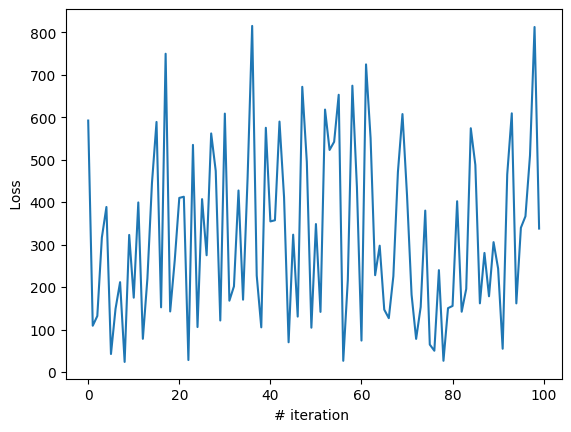

In [124]:
def implement_linear_regression ( X_feature , y_ouput , epoch_max =50 , lr =0.00001) :
  losses = []
  weights = initialize_params ()
  N = len( y_ouput )
  for epoch in range ( epoch_max ) :
    print (" epoch ", epoch )
    for i in range ( N ) :
      # get a sample - row i
      features_i = X_feature [ i ]
      y = y_ouput [ i ]

      # compute output
      y_hat = predict ( features_i , weights )
      # compute loss
      loss = compute_loss ( y_hat, y )

      # compute gradient w1 , w2 , w3 , b
      dl_dweights = compute_gradient_w ( features_i , y , y_hat )

      # update parameters
      weights = update_weight ( weights , dl_dweights , lr )

      # logging
      losses . append ( loss )
  return weights , losses
X , y = prepare_data ('/content/advertising.csv')
W , L = implement_linear_regression (X , y)
plt . plot ( L [0:100])
plt . xlabel ("# iteration ")
plt . ylabel (" Loss ")
plt . show ()

In [125]:
#Question 12:
X , y = prepare_data ('/content/advertising.csv')
W , L = implement_linear_regression (X , y , epoch_max =50 , lr =0.00001)
# Print loss value at iteration 9999
print ( L [9999])

 epoch  0
 epoch  1
 epoch  2
 epoch  3
 epoch  4
 epoch  5
 epoch  6
 epoch  7
 epoch  8
 epoch  9
 epoch  10
 epoch  11
 epoch  12
 epoch  13
 epoch  14
 epoch  15
 epoch  16
 epoch  17
 epoch  18
 epoch  19
 epoch  20
 epoch  21
 epoch  22
 epoch  23
 epoch  24
 epoch  25
 epoch  26
 epoch  27
 epoch  28
 epoch  29
 epoch  30
 epoch  31
 epoch  32
 epoch  33
 epoch  34
 epoch  35
 epoch  36
 epoch  37
 epoch  38
 epoch  39
 epoch  40
 epoch  41
 epoch  42
 epoch  43
 epoch  44
 epoch  45
 epoch  46
 epoch  47
 epoch  48
 epoch  49
451.1345292476517
